# Analisis Exploratorio
Primero importaremos las librerias

In [4]:
#importamos las librerias
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
datos= pd.read_csv("Encuesta de Remuneracion salarial Argentina.csv")

In [6]:
#Comprobamos la correcta carga del dataset
datos.head(3)

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,pagos_en_criptomonedas,que_porcentaje_o_monto_recibis_en_criptomonedas,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,porcentajebruto_o_neto,salir_o_seguir_contestando_sobre_estudios,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority,me_id_extra
0,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),475480.0,396346,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25,Varón Cis,False,Semi-Senior,Hombre Cis
1,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260000.0,220000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27,Mujer Cis,False,Junior,Mujer Cis
2,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350.0,88560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21,Varón Cis,False,Junior,Hombre Cis


In [7]:
#¿Que tipo de datos tenemos en nuestro DF?
datos.dtypes
#Contamos con una gran cantidad de datos de tipo obj, float 

estoy_trabajando_en                                                                      object
donde_estas_trabajando                                                                   object
dedicacion                                                                               object
tipo_de_contrato                                                                         object
ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local                                float64
ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local                                  object
pagos_en_dolares                                                                         object
si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron              object
pagos_en_criptomonedas                                                                   object
que_porcentaje_o_monto_recibis_en_criptomonedas                                          object
recibis_algun_tipo_de_bono              

In [8]:
# ¿Con cuanta cantidad de tipos de valores contamos en nuestro data set?
( 
    datos
    .dtypes # los tipos de datos
    .value_counts() # contemos
)

object     38
float64     6
int64       5
bool        1
Name: count, dtype: int64

In [9]:
#¿Cuantas variables y observaciones en total?
datos.shape

(5767, 50)

In [10]:
# ¿Tenemos valores nulos por columna?
(
    datos
    .isnull()
    .any()
)

estoy_trabajando_en                                                                     False
donde_estas_trabajando                                                                  False
dedicacion                                                                              False
tipo_de_contrato                                                                        False
ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local                                False
ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local                                  True
pagos_en_dolares                                                                         True
si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron              True
pagos_en_criptomonedas                                                                   True
que_porcentaje_o_monto_recibis_en_criptomonedas                                          True
recibis_algun_tipo_de_bono                                  

/home/migueldi/anaconda3/envs/EDA/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


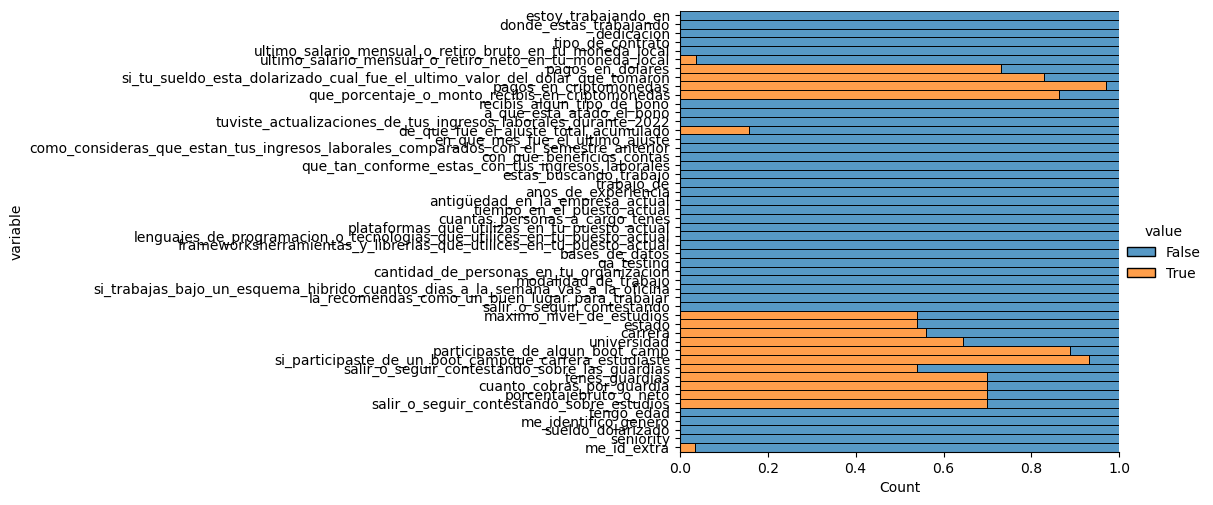

In [13]:
# Valores nulos por columna (Grafico)?
(
    datos
    .isnull()
    .melt()
    .pipe(
        lambda datos:(
            sns.displot(
                data = datos,
                y = 'variable',
                hue='value',
                multiple= 'fill'
            )
        )
    )
);
# Nos da una advertencia debido a la cantidad de variables con la que contamos

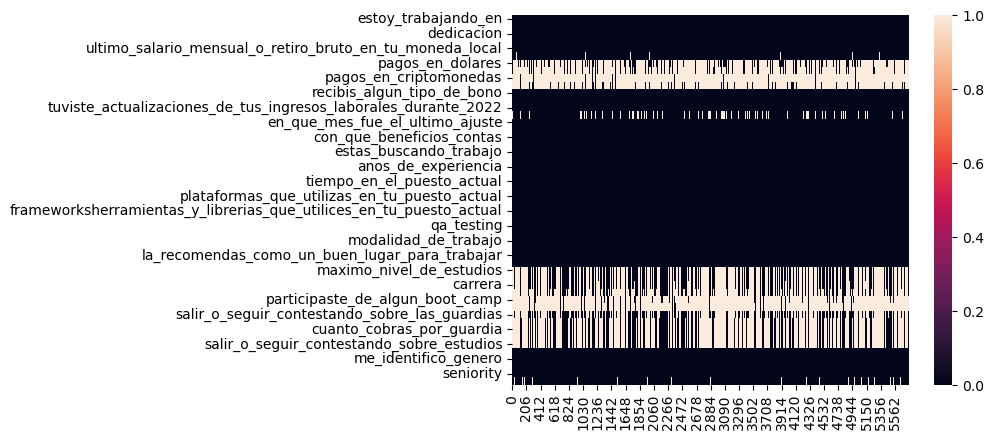

In [14]:
# ¿Valores nulos por fila (graficos)?
(
    datos
    .isnull()
    .transpose()
    .pipe(
        lambda datos:(
            sns.heatmap(
                data = datos,
            )
        )
    )
);

In [16]:
# Podemos ver que los parametros vacios responden a las columnas de preguntas
# Eliminemos los datos nulos por columna
datosLimpios =(
    datos
    .dropna(axis=1)
)

In [17]:
( # Veamos las variables de nuestro nuevo dataset
    datosLimpios
    .dtypes # los tipos de datos
    .value_counts() # contemos
)

object     18
int64       5
float64     4
bool        1
Name: count, dtype: int64